# Chaine de traitements

Une chaine de traitements est composée de différents maillons

<img src="fig/chaine2.png">

> L'impact des pré-traitements sur la performance finale est souvent très important

Nous allons donc étudier les pré-traitement les plus classiques et la manière de les implémenter proprement

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from outils.frontiere import *
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

# A. Transformation des variables de description

Les données brutes sont souvent incomplètes et bruitées, parfois trop spécifiques etc...
L'exploitation de ces informations requière leur transformation.


## A.1. Enrichissement et transformation des données

### A.1.1. Encodage des variables discrètes

Les variables descriptives sont souvent discrètes... Or les approches de machine learning ne savent pas gérer ces informations là (sauf certains arbres).

1. Charger des données discrètes   
    * prédiction de récidive de cancer
2. Afficher les 3 premières lignes (et bien comprendre qu'on a un problème par rapport aux données manipulées jusqu'ici)
3. Transformer les données

In [3]:
# récupération de données discrètes
import pandas as pd

filename = "data/breast-cancer.csv"
data = pd.read_csv(filename, header=None).values

Xbrut = data[:,:-1]
Ybrut = data[:,-1:]

print(Xbrut[:3,:], Ybrut[:3])

[["'40-49'" "'premeno'" "'15-19'" "'0-2'" "'yes'" "'3'" "'right'"
  "'left_up'" "'no'"]
 ["'50-59'" "'ge40'" "'15-19'" "'0-2'" "'no'" "'1'" "'right'" "'central'"
  "'no'"]
 ["'50-59'" "'ge40'" "'35-39'" "'0-2'" "'no'" "'2'" "'left'" "'left_low'"
  "'no'"]] [["'recurrence-events'"]
 ["'no-recurrence-events'"]
 ["'recurrence-events'"]]


In [4]:
# transformation des données
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc.fit(Xbrut)

print("Catégories: \n",enc.categories_)
X = enc.transform(Xbrut) # transformation des X

enc2 = OneHotEncoder(handle_unknown='ignore', sparse=False)
Y = enc2.fit_transform(Ybrut)[:,0] # même opération (tout en une ligne) pour les Y

print("Echantillon: \n",X[:3,:], Y[:3])

print("Comparaison des dimensions: \n",Xbrut.shape, X.shape)

Catégories: 
 [array(["'20-29'", "'30-39'", "'40-49'", "'50-59'", "'60-69'", "'70-79'"],
      dtype=object), array(["'ge40'", "'lt40'", "'premeno'"], dtype=object), array(["'0-4'", "'10-14'", "'15-19'", "'20-24'", "'25-29'", "'30-34'",
       "'35-39'", "'40-44'", "'45-49'", "'5-9'", "'50-54'"], dtype=object), array(["'0-2'", "'12-14'", "'15-17'", "'24-26'", "'3-5'", "'6-8'",
       "'9-11'"], dtype=object), array(["'no'", "'yes'", nan], dtype=object), array(["'1'", "'2'", "'3'"], dtype=object), array(["'left'", "'right'"], dtype=object), array(["'central'", "'left_low'", "'left_up'", "'right_low'",
       "'right_up'", nan], dtype=object), array(["'no'", "'yes'"], dtype=object)]
Echantillon: 
 [[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0

In [ ]:
# Analyse et performances

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# définition du modèle
mod = SVC(kernel="linear")
n_fold = 5
scores = cross_val_score(mod, X, Y, cv=n_fold, scoring='accuracy') # tout est caché dedans :)
print(scores)


In [ ]:
# On sait maintenant qu'il faut se méfier de l'accuracy dans les cas déséquilibré...
# vérification sur la balance des étiquettes 
print(np.histogram(Y,2))

# calcul du score f1
scores = cross_val_score(mod, X, Y, cv=n_fold, scoring='f1') # tout est caché dedans :)
print(scores) # ça va

### A.1.2 Création de nouvelles variables

Sur l'exemples de l'échiquier, si on ajoute un descripteur qui change de valeur sur le modulo 2 de la coordonnées des points... Le problème devient séparable linéairement

In [ ]:
# Génération des données
centers = [[float(i),float(j)] for i in range(5) for j in range(5)]
print(centers)
clusters_std = 0.2
X, y = make_blobs(n_samples=100, centers=centers, cluster_std=clusters_std,  n_features=2,   random_state=0)
y = (y % 2)*2 - 1 # chaque centre = 1 classe => Echiquier binaire

print(X.shape)
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
# Construction d'un classifieur linéaire

mod = svm.SVC(kernel="linear")
mod.fit(X,y)

plt.figure()
plot_frontiere(X,y,mod)
plt.scatter(X[:,0],X[:,1],c=y)

# plt.savefig("fig/checkers.pdf")

sc = cross_val_score(mod,X,y)
print("Scores : ", sc)

# => Les données ne sont pas séparable linéairemnet !

In [ ]:
# ajout de variables (très utiles)

Xi = np.reshape([(np.floor(i)%2)*2-1 for i in X[:,0]+0.5], (-1,1))
Xj = np.reshape([(np.floor(i)%2)*2-1 for i in X[:,1]+0.5], (-1,1))

Xe = np.concatenate((X,Xi,Xj), axis = 1)

plt.figure()
plt.imshow(Xe[:12,:])
# plt.savefig("fig/checkers_Xe.pdf")

sc = cross_val_score(mod,Xe,y)
print("Scores : ", sc)

### A.1.3 Discrétisation de variables continues

Il est parfois difficile de tirer parti des informations continues et plus simple de créer des variables encodant directement l'appartenance à un segment.

e.g. : données étalées entre 1 et 10, avec:
* un peu de points uniformément répartis entre 1 et 5
* beaucoup de points centrés en 7.5 avec une faible dispersion
* beaucoup de points centrés en 9 avec une faible dispersion

$\Rightarrow$ ce type de distribution destabilise les approches de ML

1. La fonction qui permet de faire ça est: `KBinsDiscretizer`
2. Génerer des données et tester cette fonction
3. [OPT] Réfléchir au pont entre modèle linéaire et arbres

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# générer des données 1D 

# tester la fonction et afficher la matrice créée

## A.2. Normalisation des données (par colonne)

Soit des données tabulaires classiques:
$$X = \begin{pmatrix}  x_{11}& x_{12} &  \ldots & x_{1d}  \\
x_{21}& x_{22} & \ldots & x_{2d} \\
\vdots& \vdots & \ddots &\vdots \\
x_{n1}& x_{n2} & \ldots & x_{nd}  \\
\end{pmatrix} ,\qquad
Y = \begin{pmatrix}  y_{1} \\
y_{2}\\
\vdots\\
y_{n} \\
\end{pmatrix} ,\qquad y_i\in \mathcal Y
$$

Dans la plupart des cas, le problème vient des $X_j$ :

* qui ne sont pas codés dans les mêmes échelles. e.g. colonne $i$ en $10^{-5}$, colonne $j$ en $10^{-9}$ 
* qui ont simplement un biais trop important, e.g. valeur entre $1050$ et $1070$

Les algorithmes de ML sont souvent destabilités par ces écarts de valeur. Il faut normaliser pour obtenir de bonnes performances

On utilise presque tout le temps une normlisation standard gaussienne consistant à centrer réduire les $X_j \Rightarrow \tilde{X}_j \sim \mathcal N(0,1)$.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [ ]:
import pandas as pd

filename = "data/winequality-red.csv"
data = pd.read_csv(filename)

data.head(10)

In [ ]:
# Comparaison des performances avec et sans normalisation
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X = data.values[:,:-1]
Y = data.values[:,-1]
# remise en forme des Y entre 0 et nClasses
val = np.unique(Y)
transf = dict(zip(val,np.arange(len(val)))) # mapping [x,y,z] => [0,1,2]
Y = np.vectorize(transf.get)(Y)             # application de la transformation

mod = SVC()
sc = cross_val_score( mod, X, Y, scoring='accuracy')

print("Scores ",sc,sc.mean())

# normalisation des données
scal = StandardScaler()

# 1. Appliquer la transformation (cf doc)

# 2. Calculer la performance

###  TODO  ###

print("Scores sur données normalisées ",sc,sc.mean())


**Question d'ouverture**

L'impact de la normalisation est-il le même sur tous les classifieurs?

Non, évidemment

In [ ]:
import xgboost as xgb # !pip install xgboost # en cas de besoin

bst = xgb.XGBClassifier()
sc = cross_val_score( bst, X, Y, scoring='accuracy')
print("xgboost : ",sc, sc.mean())

sc = cross_val_score( bst, Xn, Y, scoring='accuracy')
print("xgboost (normalisé): ",sc, sc.mean())

## A.3. Normalisation par individu

Sur certaines applications spécifiques comme la classification de signaux ou les données textuelles, on normalise les individus afin de les rendre comparables

* par défaut, un texte de 100 mots n'est pas comparable avec un texte de 1000 mots
* les log à la station chatelet dans une journée de semaine ne sont pas comparables avec un week-end

Les deux normalisations les plus connues (et utilisées) sont:

1. La normalisation probabiliste (les variables de l'individu somme à 1), on fait une hypothèse multinomiale sur les variables
    * pour le texte notamment
1. La normalisation min-max => 0-1
    * souvent pour les signaux
    * Evidemment, en fonction de l'application visée, ça peut être utile ou au contraire néfaste

In [ ]:
import pandas as pd

filename = "data/Beef_TRAIN.tsv"
data = pd.read_csv(filename, header=None, sep='\t')

print(np.unique(data.values[:,0], return_counts=True))

data.head(10)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = data.values[:,1:]
Y = data.values[:,0]
# remise en forme des Y entre 0 et nClasses
val = np.unique(Y)
transf = dict(zip(val,np.arange(len(val)))) # mapping [x,y,z] => [0,1,2]
Y = np.vectorize(transf.get)(Y)             # application de la transformation

mod = SVC()
sc = cross_val_score( mod, X, Y, scoring='accuracy')

print("Scores ",sc,sc.mean())

# normalisation des données
scal = MinMaxScaler()
#scal = StandardScaler() # vous pouvez switcher pour voir...
Xn = scal.fit_transform(X)
sc = cross_val_score( mod, Xn, Y, scoring='accuracy')

print("Scores sur données normalisées ",sc,sc.mean())


# B. Etude approfondie du cas Auto-mpg

Effectuer le même genre d'opération sur le jeu de données UCI Auto MPG, consistant à prédire la consommation (MPG) d'un ensemble de voitures.

https://archive.ics.uci.edu/ml/datasets/auto+mpg

1. Tester un régresseur de base sur le sous-ensemble de colonnes correspondant à des données numériques 
2. Encoder les colonnes catégorielles et comparer la performance
3. Que penser des colonnes de date et de cylindrée?
    * Tester leur prise en compte numérique *vs* leur prise en compte catégorielle
4. La dernière colonne est séparable en plusieurs (marque, modèle)
    * Quel impact sur les performances
5. Imaginer d'autres manières de prendre en compte les valeurs manquantes



In [5]:
# Chargement des données (1/2)

filename = "data/auto-mpg.csv"
data = pd.read_csv(filename)
X = data.values[:,1:]
Y = data.values[:,0]

# la colonne 2 contient des données manquantes (?)... Et elle est encodée en chaine de caractères...
data.loc[30:40, :] # equiv. dans pandas de: print(X[30:40])

# alternative : data.head(50)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
30,28.0,4,140.0,90,2264,15.5,71,1,chevrolet vega 2300
31,25.0,4,113.0,95,2228,14.0,71,3,toyota corona
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
33,19.0,6,232.0,100,2634,13.0,71,1,amc gremlin
34,16.0,6,225.0,105,3439,15.5,71,1,plymouth satellite custom
35,17.0,6,250.0,100,3329,15.5,71,1,chevrolet chevelle malibu
36,19.0,6,250.0,88,3302,15.5,71,1,ford torino 500
37,18.0,6,232.0,100,3288,15.5,71,1,amc matador
38,14.0,8,350.0,165,4209,12.0,71,1,chevrolet impala
39,14.0,8,400.0,175,4464,11.5,71,1,pontiac catalina brougham


## B.1. La gestion des données manquantes

De nombreux jeux de données présentent des données manquantes, souvent dans une ou deux colonnes et sur quelques lignes. La question de savoir comment traiter ce cas de figure occupe beaucoup la communauté.

1. Du point de vue théorique, ça relève de l'algorithme EM pour l'estimation de valeur manquante
2. Du point de vue très opérationnel, on peut:
    * supprimer les lignes affectées
    * affecter la valeur moyenne de la colonne aux cases manquantes (cf case ci-dessous)
3. D'autres stratégies assez simples sont disponibles dans sk-learn

In [6]:
# Chargement des données (2/2)

# On propose de les remplacer par la valeur moyenne de la colonne [A LA MAIN]
# 1. On remplace par des 0
X[:,2] = [0 if X[i,2] == '?' else int(X[i,2]) for i in range (len(X))]
# 2. On remplace par la moyenne
m = np.round(X[:,2].sum()/np.where(X[:,2]>0, 1, 0).sum()) # 104
X[:,2] = np.where(X[:,2]==0, m, X[:,2])

print(X[30:40])

[[4 140.0 90 2264 15.5 71 1 'chevrolet vega 2300']
 [4 113.0 95 2228 14.0 71 3 'toyota corona']
 [4 98.0 104.0 2046 19.0 71 1 'ford pinto']
 [6 232.0 100 2634 13.0 71 1 'amc gremlin']
 [6 225.0 105 3439 15.5 71 1 'plymouth satellite custom']
 [6 250.0 100 3329 15.5 71 1 'chevrolet chevelle malibu']
 [6 250.0 88 3302 15.5 71 1 'ford torino 500']
 [6 232.0 100 3288 15.5 71 1 'amc matador']
 [8 350.0 165 4209 12.0 71 1 'chevrolet impala']
 [8 400.0 175 4464 11.5 71 1 'pontiac catalina brougham']]


Stratégies alternatives **à maitriser** :

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute

In [7]:
# application directe de la fonction:

from sklearn.impute import SimpleImputer

X = data.values[:,1:]
Y = data.values[:,0]

imp_mean = SimpleImputer(missing_values='?', strategy='mean') # attention, fonction par robuste aux str
Xnum = imp_mean.fit_transform(X)

# que se passe-t-il?

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '?'

In [8]:
# Version corrigée: il faut passer les données en numérique
from sklearn.impute import SimpleImputer

Xnum = data.values[:,1:7] # récupération des données avec cases manquantes
# 1. On remplace les ? par des np.nan + transformation numérique
Xnum[:,2] = [np.nan if Xnum[i,2] == '?' else int(X[i,2]) for i in range (len(Xnum))]
# 2. On utilise un outil sklearn
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') # attention, fonction par robuste aux str
Xnum = imp_mean.fit_transform(Xnum)

print(Xnum[30:40])

[[4.00000000e+00 1.40000000e+02 9.00000000e+01 2.26400000e+03
  1.55000000e+01 7.10000000e+01]
 [4.00000000e+00 1.13000000e+02 9.50000000e+01 2.22800000e+03
  1.40000000e+01 7.10000000e+01]
 [4.00000000e+00 9.80000000e+01 1.04469388e+02 2.04600000e+03
  1.90000000e+01 7.10000000e+01]
 [6.00000000e+00 2.32000000e+02 1.00000000e+02 2.63400000e+03
  1.30000000e+01 7.10000000e+01]
 [6.00000000e+00 2.25000000e+02 1.05000000e+02 3.43900000e+03
  1.55000000e+01 7.10000000e+01]
 [6.00000000e+00 2.50000000e+02 1.00000000e+02 3.32900000e+03
  1.55000000e+01 7.10000000e+01]
 [6.00000000e+00 2.50000000e+02 8.80000000e+01 3.30200000e+03
  1.55000000e+01 7.10000000e+01]
 [6.00000000e+00 2.32000000e+02 1.00000000e+02 3.28800000e+03
  1.55000000e+01 7.10000000e+01]
 [8.00000000e+00 3.50000000e+02 1.65000000e+02 4.20900000e+03
  1.20000000e+01 7.10000000e+01]
 [8.00000000e+00 4.00000000e+02 1.75000000e+02 4.46400000e+03
  1.15000000e+01 7.10000000e+01]]


## B.2. Analyse du contenu 

Nous nous intéressons d'abord à la dernière colonne qui est problématique (car non numérique)... Puis à toutes les autres colonnes

In [9]:
# analyse de la dernière colonne:
print("Combien de valeurs uniques:", len(np.unique(X[:,-1])), "(nb val=",len(X),")")


Combien de valeurs uniques: 305 (nb val= 398 )


In [10]:
#Il faut sans doute se limiter à la marque:
# remplacer le nom complet du modèle par la marque seule (cette information peut avoir de la valeur pour estimer la consommation)

###  TODO  ###


['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'ford']


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

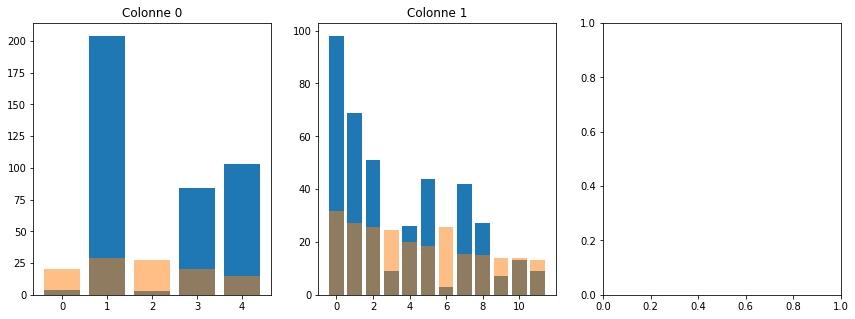

In [11]:

# Analyse des colonnes (histogramme)
plt.figure(figsize=[5*X.shape[1],5])
for i in range(X.shape[1]):
    plt.subplot(1,X.shape[1],i+1)
    # plt.figure()
    if i<X.shape[1]-1: # colonne numériques
        nbins = np.minimum(len(np.unique(X[:,i])), 12) # extraction des colonnes à valeurs discrètes
        [e,x] = np.histogram(X[:,i], nbins)
        x[-1] += 0.001
        conso = [Y[np.logical_and(X[:,i]>=x[j], X[:,i]<x[j+1])].mean() for j in range(len(e))]
        # print(e,x)
        plt.bar(np.arange(len(e)),e)
        plt.bar(np.arange(len(e)),conso, alpha=0.5)
        plt.title('Colonne '+str(i))
    else: # colonnes textuelles
        val,e = np.unique(X[:,-1], return_counts=True)
        plt.bar(np.arange(len(e)),e)
        conso = [Y[X[:,-1] == v].mean() for v in val]
        plt.bar(np.arange(len(e)),conso, alpha=0.5)
        plt.title('Colonne '+str(i))

#plt.savefig('fig/auto-mpg-all.png')
plt.show()


## B.3. Performances de base puis enrichissement des données

On calcule d'abord une performance sur les données numériques faciles à exploiter... Puis on va enrichir la représentation

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

# Construction d'un modèle de référence sur les colonnes numériques
Xr = Xnum[:,1:6]
mod = Ridge()

sc = cross_val_score( mod, Xr, Y, scoring='neg_mean_absolute_percentage_error')

print("modèle de référence : ",sc, sc.mean())

print(Xr.shape)



modèle de référence :  [-0.20275314 -0.16638221 -0.09926274 -0.13836117 -0.12857235] -0.14706632190591318
(398, 5)


In [17]:
# Transfromation des données et Amélioration (?) des résultats

enc = OneHotEncoder(handle_unknown='ignore', sparse=False) # aller voir la document (ou ex plus haut)

for col  in [0,5,6,7]: # pour chacune de ces colonnes discrètes, 
    # Construire la matrice Xtmp one-hot des occurences de variables discrètes
    # Concaténer Xtmp avec Xr
    ###  TODO  ###


(398, 5)
Ajout colonne =  0
modèle de référence :  [-0.18306665 -0.1337533  -0.10948645 -0.12233257 -0.11801171] -0.13333013718506842
(398, 13)
Ajout colonne =  5
modèle de référence :  [-0.15150719 -0.13009139 -0.10197748 -0.14022774 -0.11004438] -0.126769634484864
(398, 3)
Ajout colonne =  6
modèle de référence :  [-0.14878915 -0.12793797 -0.10092474 -0.13974282 -0.10217814] -0.1239145616719182
(398, 37)
Ajout colonne =  7
modèle de référence :  [-0.15140792 -0.12472764 -0.09821258 -0.13775166 -0.10165919] -0.12275179844037618



## B.4. Histogramme de valeurs

Il est parfois intéressant de convertir une variable continue en un histogramme de valeurs. Sur la colonne 1 des données, on avait l'impression qu'il y avait des comportements un peu similaire par groupe de valeurs... On a donc ajouté des catégories.

In [ ]:
# Transformation de la caractéristique 5 (Année)
from sklearn.preprocessing import KBinsDiscretizer

dim = 1 # dimension à encoder
#print(X[:10,dim])
enc = KBinsDiscretizer(n_bins=4, encode='onehot', strategy='uniform') # comprendre la signification des arguments
Xtmp = enc.fit_transform(X[:,dim].reshape(-1,1)).toarray()
#print(Xtmp[:10,:])
Xr = np.concatenate((Xr, Xtmp), axis = 1)
sc = cross_val_score( mod, Xr, Y, scoring='neg_mean_absolute_percentage_error')
print(Xtmp.shape)
print("modèle de référence : ",sc, sc.mean())


## B.5. Transformations arbitraires

Enrichir les données construisant une colonne binaire qui vaut 1 pour les voitures de 4 cylindres de moins de 2500 en masse

In [ ]:
# créer une colonne biaire qui recense les petites voitures (masse<2500) de 4 cylindres

Xtmp = np.where(np.logical_and(X[:,0]==4, X[:,4]<2500), 1, 0).reshape(-1,1)
Xr = np.concatenate((Xr, Xtmp), axis = 1)
sc = cross_val_score( mod, Xr, Y, scoring='neg_mean_absolute_percentage_error')
print(Xtmp.shape)
print("modèle de référence : ",sc, sc.mean())


## B.6. Passage à un modèle de l'état de l'art

Est ce que les variables construites ont du sens pour un modèle non-linéaire de type XGBoost?


In [ ]:
# Passage à un modèle de l'état de l'art

# XGboost

import xgboost as xgb # !pip install xgboost # en cas de besoin

bst = xgb.XGBRegressor()
sc = cross_val_score( bst, Xr, Y, scoring='neg_mean_absolute_percentage_error')
print("xgboost : ",sc, sc.mean())

sc = cross_val_score( bst, X[:,:6], Y, scoring='neg_mean_absolute_percentage_error')
print("xgboost (X origine): ",sc, sc.mean())

# C. Construction d'une chaine de traitements en scikit-learn

## C.1. Cas d'usage: sélection de caractéristique

1. Construire des données bruitées
2. Construire un sélecteur de variables pertinentes 
    * Afin de prolonger le TP précedent, on choisit de construire un sélecteur basé sur la corrélation... En utilisant l'héritage pour une parfaite intégration dans la chaine
3. L'intégrer dans la chaine (`Pipeline`)
4. Vérifier:
    * que la chaine est apprenable
    * évaluable
    * que les éléments de la chaine ont des dimensions raisonnables

In [ ]:
# données + dimensions inutiles
centers = [[-2.0, -2.0], [2.0, 2.0]]
clusters_std = [1.5, 1.5]
X, y = make_blobs(n_samples=100, centers=centers, cluster_std=clusters_std,  n_features=2,   random_state=0) # 100 pts, 2classes, 2dim 

# ajout de bruit
ndim_noise = 20
Noise = np.random.randn(len(X), ndim_noise)*clusters_std[0]
Xn = np.concatenate((X,Noise), axis=1)

# split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.33, random_state=0)

In [ ]:
# Construction d'un estimateur sklearn calculant la corrélation des différentes features avec la cible
# => fit ne fait rien
# => score renvoie la somme des correlations des variables retenues
from sklearn.base import BaseEstimator

class Correl(BaseEstimator):
    def fit(self,X,y):
        return self
    def score(self,X,y):
        return np.sum(X.T@y)

In [ ]:
# Selection de caractéristiques
from sklearn.feature_selection import SequentialFeatureSelector

estimator = Correl()
selector = SequentialFeatureSelector(estimator, n_features_to_select=4) # j'utilise mon outil dans le selecteur sklearn
selector = selector.fit(X_train, y_train)

print(selector.get_support())

# il est ensuite possible de filtrer les données:
Xnew = selector.transform(X_train)

In [ ]:
# Construction de la chaine (pipeline)
from sklearn.pipeline import Pipeline
classif = svm.SVC(kernel = 'linear')
# liste de tuples: titre + objet 
pipe = Pipeline([('sel. var',selector),('classif',classif)])


In [ ]:

# Vérification de l'usage et des propriétés du nouvel objet
pipe.fit(X_train,y_train)           # 1. Apprentissage
yhat = pipe.predict(X_test)         # 2. inférence
tx = accuracy_score(yhat, y_test)   # 3. Evaluation (même si pipe n'entre pas directement en jeu)

print("taux de bonne classif: ", tx)

In [ ]:
# Vérification des dimensions du classifieur
print("Dimension du classifieur: ", classif.coef_.shape)

## C.2. Même exercice avec une PCA & un arbre de décision

**Exercice :** Construire une chaine composée de 
* Une projection PCA sur 3 axes 
* Un arbre de décision
* Calculer la performance de cette chaine et afficher l'arbre

In [ ]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,plot_tree

###  TODO  ###

## C.3. Optimisation de la chaine de traitements

La construction n'est pas une fin en soi: l'idée est de pouvoir optimiser la chaine à la fois au niveau des paramètres de pré-traitements et des hyper-paramètres.

On veut tester les options suivantes (en combinaison):
* Sélection de 2 à 5 variables (avec le sélecteur simple à base de correlation)
* SVM
    * noyau linéaire
    * noyau gaussien avec `gamma = [0.1, 0.5, 1, 2, 5]`
    * compromis de régularisation : `C = [0.1,1,5,10,100]`

1. Construire la chaine de traitement
2. Utiliser le `grid_search` vu dans le TP 1 pour optimiser l'ensemble
    * Dans un premier temps, mettre tous les paramètres *en vrac* <BR>
    https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
    * Dans un second temps, essayer de ne pas calculer les combinaisons absurdes (tester toutes les valeurs de gamma pour un noyau linéaire) <BR>
    Il faut faire des sous-dictionnaires

3. Expliquer quelle chaine est retenue et à quel niveau de performances attendu

> A votre avis, êtes-vous dans dans un cadre APP/TEST ou dans un cadre APP/VAL/TEST?


In [ ]:
# Construction de la chaine (pipeline)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

# V1 : test en vrac (~20 secondes sur mon ordinateur portable)

# v2 : test raisonnable (~3.5 secondes sur mon ordinateur portable)

### MISE EN PLACE DE LA CHAINE ###
classif = svm.SVC()
# liste de tuples: titre + objet 
pipe = Pipeline([('selvar',selector),('classif',classif)])

# paramètres en vrac: TITRE__para: [valeurs à tester]
# V1
grid = {
    "selvar__n_features_to_select": [2, 3, 4, 5],
    "classif__C": [0.1,1,5,10,100],
    "classif__gamma": [0.1, 0.5, 1, 2, 5],
    "classif__kernel": ["linear","rbf"],
}
#V2 avec sous-dictionnaire
grid = [
    {"selvar__n_features_to_select": [2, 3, 4, 5]},
    {"classif__C": [0.1,1,5,10,100]},
    {"classif__kernel": ["linear"]},
    {"classif__gamma": [0.1, 0.5, 1, 2, 5],
    "classif__kernel": ["rbf"]}
]
# param_grid = list(ParameterGrid(grid))
# print(list(ParameterGrid(grid)))

search = GridSearchCV(pipe, grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


## C.4. Exercice

Mêmes opérations que précédemment, mais:

* Sur les données de qualité du vin
* avec une normalisation standard
* une random forest ou un XGBoost dont on fera varier le nombre et la profondeur des arbres


In [ ]:
filename = "data/winequality-red.csv"
data = pd.read_csv(filename)
X = data.values[:,:-1]
Y = data.values[:,-1]
# remise en forme des Y entre 0 et nClasses
val = np.unique(Y)
transf = dict(zip(val,np.arange(len(val)))) # mapping [x,y,z] => [0,1,2]
y = np.vectorize(transf.get)(Y)             # application de la transformation


In [ ]:
# TODO

## C.5. Chaine de traitement et enrichissement des données

Mêmes opérations que précédemment, mais en ajoutant des dimensions.

La difficulté est de trouver l'objet scikit-learn qui permet d'insérer des colonnes dans les données

* La chaine transformera les variables en catégories (one-hot) 
* Appliquera une régression logistique

Le but est ensuite de chercher à optimiser une chaine de traitement contenant de l'enrichissement de données (par exemple, tester différentes valeurs pour la discrétisation)



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

features_id = [3]
scale_id = [1,2]

preprocessor = ColumnTransformer(
    [
        ("untouched", StandardScaler(), scale_id ), # np.setdiff1d(np.arange(X.shape[1]), features_id)),
        (
            "tobin",
            KBinsDiscretizer(n_bins=10, encode='onehot', strategy='uniform'),
            features_id,
        ),
    ],
)

#print(np.setdiff1d(np.arange(X.shape[1]), features_id))
# print(preprocessor.fit_transform(X).toarray())
print(X.shape)

log_reg = make_pipeline(preprocessor, LogisticRegression())
log_reg.fit(X, y)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression

X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
numeric_features = ["age", "fare"]
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
categorical_features = ["embarked", "pclass"]

preprocessor = ColumnTransformer(
    [
        ("num", numeric_transformer, numeric_features),
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore", sparse=False),
            categorical_features,
        ),
    ],
    verbose_feature_names_out=False,
)
log_reg = make_pipeline(preprocessor, SelectKBest(k=7), LogisticRegression())
#log_reg.fit(X, y)

sc = cross_val_score(log_reg, X, y)
print(sc)

# Construction du sujet à partir de la correction

In [1]:
###  TODO )"," TODO ",\
    txt, flags=re.DOTALL))
f2.close()

### </CORRECTION> ###